In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu, berry_connection, berry_from_connection
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley, M_valley

In [9]:
%matplotlib notebook

In [2]:
delta = 0.01
Delta = 0.01

kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta, twobytwo=True)
Omega, Mu = berry_mu(Kx, Ky, E, Psi)
splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)

In [6]:
EF = 0.015
T = 0

f = feq_func(E2, EF, T)
M = M_valley(kx2, ky2, f, splE, splO, splM, Efield=[1,0], tau=.1, EF=EF)

<IPython.core.display.Javascript object>


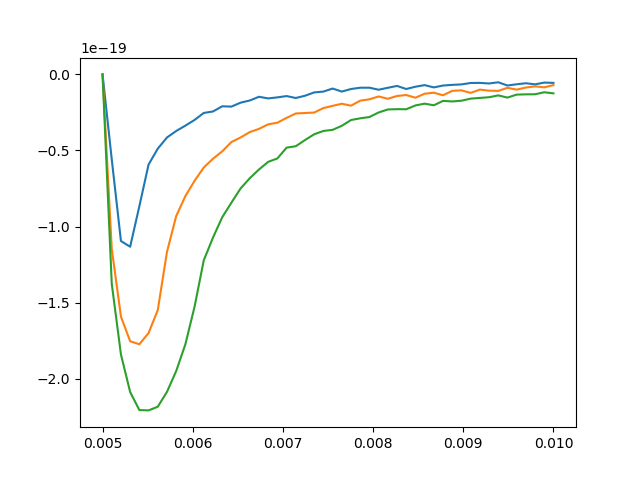

In [25]:
EFs = np.linspace(0.005,0.01, 50)
deltas = [.001, .002, .003]
Ms = np.empty_like(EFs)

fig, ax = plt.subplots()

for delta in deltas:
    kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta, twobytwo=True)
    Omega, Mu = berry_mu(Kx, Ky, E, Psi)
    splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
    kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)
    
    for i, EF in enumerate(EFs):
        f = feq_func(E2, EF, T)
        Ms[i] = M_valley(kx2, ky2, f, splE, splO, splM, Efield=[1,0], tau=.1, EF=EF)

    ax.plot(EFs, Ms)

In [18]:
feq_func(E2, 0.01, 0).any()

True